# NLP - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi.newsapi_client import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from nltk.util import ngrams

%matplotlib inline

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 8]
[nltk_data]     nodename nor servname provided, or not known>


In [2]:
# Read your api key environment variable
# Load .env enviroment variables

load_dotenv("example.env")
api_key = os.getenv("NEWS_API_KEY")


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [27]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about bitcoin: 4159


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Jonathan Shieber',
 'title': 'Casa pivots to provide self-custody services to secure bitcoin',
 'description': 'Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbase. “With self-custody using Casa it’s impossible to be hacke…',
 'url': 'http://techcrunch.com/2020/08/06/casa-pivots-to-provide-self-custody-services-to-secure-bitcoin/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/06/GettyImages-1050523528.jpg?w=600',
 'publishedAt': '2020-08-06T18:25:29Z',
 'content': 'Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbas… [+1571 chars]'}

In [28]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 1336


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
 'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
 'url': 'https://mashable.com/article/metamask-ios-android/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
 'publishedAt': '2020-09-02T16:00:00Z',
 'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]"}

In [29]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []
for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu         
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2020-08-06,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851
1,2020-08-03,"In April, the Secret Service seized 100 Bitcoi...",0.0000,0.000,0.000,1.000
2,2020-08-06,"The question still remained, though, whether a...",-0.0516,0.065,0.071,0.864
3,2020-08-04,A ransomware variant called NetWalker is doing...,0.5106,0.122,0.000,0.878
4,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937


In [30]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []
for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.000,0.791
1,2020-08-17,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.000,1.000
2,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.000,0.819
3,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.000,1.000
4,2020-08-19,An outspoken Bitcoin whale who rarely shows af...,-0.2677,0.045,0.074,0.881


In [31]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,98.000000,98.000000,98.000000,98.000000
mean,0.162556,0.077694,0.045735,0.876602
std,0.454087,0.059003,0.066314,0.075407
min,-0.865800,0.000000,0.000000,0.588000
25%,-0.121675,0.007250,0.000000,0.836500
50%,0.273200,0.090000,0.000000,0.882000
75%,0.507000,0.120250,0.085000,0.910000
max,0.790100,0.222000,0.294000,1.000000


In [32]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,94.00000,94.000000,94.000000,94.000000
mean,0.06174,0.059809,0.045553,0.894638
std,0.43003,0.069183,0.067205,0.086553
min,-0.91000,0.000000,0.000000,0.689000
25%,-0.14050,0.000000,0.000000,0.840250
50%,0.00000,0.053500,0.000000,0.912000
75%,0.40190,0.087500,0.075000,0.988000
max,0.85190,0.311000,0.309000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [18]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [11]:
bitcoin_df.text[0]

'Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbas… [+1571 chars]'

In [40]:
# Expand the default stopwords list if necessary
# We can define our own list of stopwords to add to the default nltk words
sw_addon = {'youve','yet'}


In [47]:
# Complete the tokenizer function
# Define function

def tokenizer(text):
    """Tokenizes text."""
    # Remove the stop words  
    sw = set(stopwords.words('english'))
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a list of the words
    words = word_tokenize(re_clean)
    # Convert the words to lowercase
    lower_words = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in lower_words]

    return tokens

    

In [48]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.tokens

0     [casa, coloradobased, provider, bitcoin, secur...
1     [april, secret, service, seized, bitcoins, cla...
2     [question, still, remained, though, whether, g...
3     [ransomware, variant, called, netwalker, surpr...
4     [covid, pandemic, resulted, mass, shift, worki...
5     [appears, massive, coordinated, strike, reddit...
6     [london, reuters, bitcoin, jumped, highest, ye...
7     [robot, colleague, satoshi, nakaboto, writes, ...
8     [robot, colleague, satoshi, nakaboto, writes, ...
9     [robot, colleague, satoshi, nakaboto, writes, ...
10    [prankster, disrupted, judicial, hearing, wedn...
11    [robot, colleague, satoshi, nakaboto, writes, ...
12    [robot, colleague, satoshi, nakaboto, writes, ...
13    [robot, colleague, satoshi, nakaboto, writes, ...
14    [robot, colleague, satoshi, nakaboto, writes, ...
15    [robot, colleague, satoshi, nakaboto, writes, ...
16    [robot, colleague, satoshi, nakaboto, writes, ...
17    [robot, colleague, satoshi, nakaboto, writ

In [49]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df

,date,text,compound,positive,negative,neutral,tokens
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.000,0.791,"[interacted, cryptocurrencies, past, couple, y..."
1,2020-08-17,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.000,1.000,"[tldr, mega, blockchain, mastery, bundle, sale..."
2,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.000,0.819,"[london, reuters, sound, like, surefire, bet, ..."
3,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.000,1.000,"[new, york, reuters, brooklynbased, technology..."
4,2020-08-19,An outspoken Bitcoin whale who rarely shows af...,-0.2677,0.045,0.074,0.881,"[outspoken, bitcoin, whale, rarely, show, affe..."
5,2020-08-14,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...,0.3400,0.072,0.000,0.928,"[reutersrick, wilkingullimichael, novogratz, t..."
6,2020-08-04,"August\r\n4, 2020\r\n5 min read\r\nOpinions ex...",0.5423,0.123,0.000,0.877,"[august, min, readopinions, expressed, entrepr..."
7,2020-08-11,Ethereum is one of the most growing cryptocurr...,0.2484,0.057,0.000,0.943,"[ethereum, one, growing, cryptocurrencies, rec..."
8,2020-09-01,"Ethereum, having long played second fiddle to ...",0.4019,0.110,0.000,0.890,"[ethereum, long, played, second, fiddle, numbe..."
9,2020-09-01,POLAND - 2020/06/15: In this photo illustratio...,0.0000,0.000,0.000,1.000,"[poland, photo, illustration, ethereum, logo, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [55]:
from collections import Counter
from nltk import ngrams

In [ ]:
# Generate the Bitcoin N-grams where N=2
# Create a string of all the contents in the text column of bitcoin_df dataframe
bitcoin_string = bitcoin_df.text.str.cat()
bitcoin_string

In [ ]:
# Tokenize the string before applying bigram counter
bitcoin_string_tokenized = tokenizer(bitcoin_string)
bitcoin_string_tokenized

In [ ]:
# Calculate the bigrams for the tokekized string based on 2 words
bitcoin_bigram_counts = Counter(ngrams(bitcoin_string_tokenized, n=2))
print(dict(bigram_counts.most_common()))

In [ ]:
# Create a string of all the contents in the text column of bitcoin_df dataframe
ethereum_string = ethereum_df.text.str.cat()
ethereum_string

# Tokenize the string before applying bigram counter
ethereum_string_tokenized = tokenizer(ethereum_string)
ethereum_string_tokenized

In [ ]:
# Generate the Ethereum N-grams where N=2

ethereum_bigram_counts = Counter(ngrams(ethereum_string_tokenized, n=2))
print(dict(ethereum_bigram_counts.most_common()))

In [67]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)



In [68]:
# Get the top 10 words for Bitcoin
print(token_count(bitcoin_string_tokenized,10))

TypeError: token_count() takes 1 positional argument but 2 were given

In [ ]:
# Get the top 10 words for Ethereum
print(token_count(ethereum_string_tokenized,10))

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

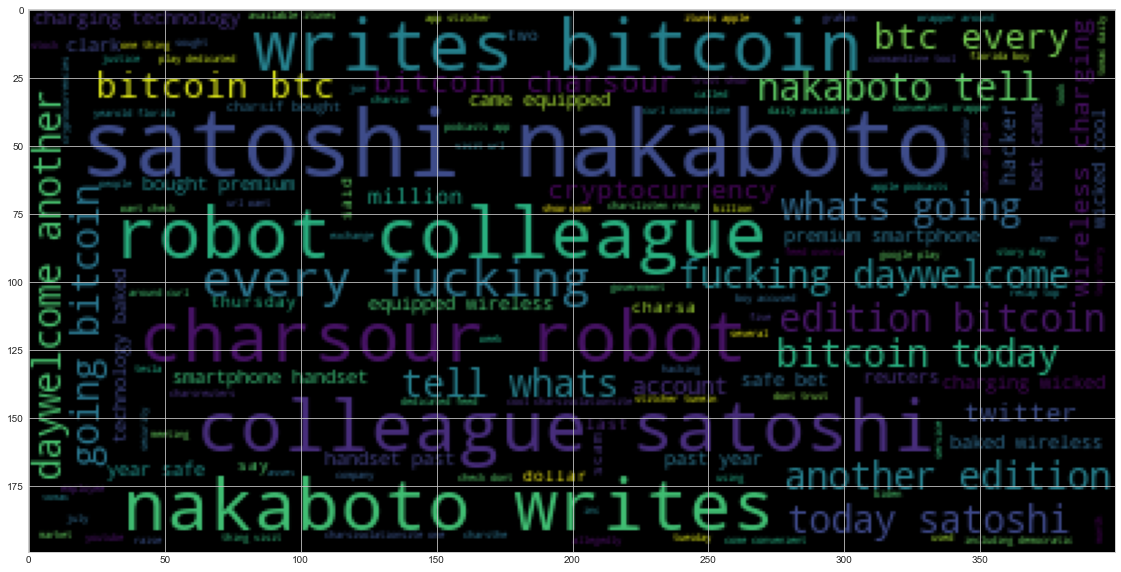

In [66]:
# Generate the Bitcoin word cloud
big_string = ' '.join(bitcoin_string_tokenized)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

In [ ]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [ ]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm


In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---